In [29]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [30]:
from google.colab import files
file_uploaded = files.upload()

Saving BostonHousing.csv to BostonHousing (4).csv


In [31]:
data = pd.read_csv('./BostonHousing.csv')

In [32]:
x_data = data.copy()

ori_y = x_data.pop('MEDV')


In [33]:

x_train1, x_test, y_train1, y_test = train_test_split(x_data, ori_y, test_size=0.3, shuffle=True)
x_train, x_valid, y_train, y_valid = train_test_split(x_train1, y_train1, test_size=0.2, shuffle=True)

In [34]:
input_layer = tf.keras.layers.Input(shape=(13,))
x = tf.keras.layers.Dense(50, activation='sigmoid')(input_layer)
x = tf.keras.layers.Dense(100, activation='sigmoid')(x)
x = tf.keras.layers.Dense(300, activation='sigmoid')(x)
out_layer = tf.keras.layers.Dense(1, activation=None)(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense (Dense)                (None, 50)                700       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 300)               30300     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 301       
Total params: 36,401
Trainable params: 36,401
Non-trainable params: 0
_________________________________________________________________


In [35]:
loss = tf.keras.losses.mean_squared_error
optimizer = tf.keras.optimizers.SGD(lr=0.0004)
metrics = tf.keras.metrics.RootMeanSquaredError()
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metrics])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [36]:
result = model.fit(x_train, y_train, epochs = 200, batch_size = 10, validation_data=(x_valid, y_valid))

Epoch 1/200
29/29 [==============================] - 1s 9ms/step - loss: 222.1694 - root_mean_squared_error: 14.9053 - val_loss: 71.6373 - val_root_mean_squared_error: 8.4639
Epoch 2/200
29/29 [==============================] - 0s 2ms/step - loss: 89.1709 - root_mean_squared_error: 9.4430 - val_loss: 67.4059 - val_root_mean_squared_error: 8.2101
Epoch 3/200
29/29 [==============================] - 0s 2ms/step - loss: 88.0698 - root_mean_squared_error: 9.3846 - val_loss: 66.8835 - val_root_mean_squared_error: 8.1782
Epoch 4/200
29/29 [==============================] - 0s 2ms/step - loss: 87.7824 - root_mean_squared_error: 9.3692 - val_loss: 67.4162 - val_root_mean_squared_error: 8.2107
Epoch 5/200
29/29 [==============================] - 0s 3ms/step - loss: 88.0133 - root_mean_squared_error: 9.3815 - val_loss: 67.0061 - val_root_mean_squared_error: 8.1857
Epoch 6/200
29/29 [==============================] - 0s 2ms/step - loss: 87.9080 - root_mean_squared_error: 9.3759 - val_loss: 66.372

In [ ]:
print(result.history.keys())

In [38]:
loss = result.history['loss']
val_loss = result.history['val_loss']

5/5 [==============================] - 0s 2ms/step - loss: 74.6753 - root_mean_squared_error: 8.6415

 Test rmse: 8.6415


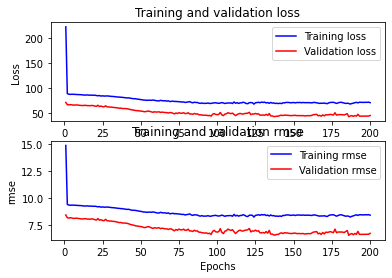

In [39]:
### loss와 val_loss를 그래프화
epochs = range(1, len(loss) + 1)
plt.subplot(211)  ## 2x1 개의 그래프 중에 1번째
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### history에서 mean_absolute_error val_mean_absolute_error key를 가지는 값들만 추출
rmse = result.history['root_mean_squared_error']
val_rmse = result.history['val_root_mean_squared_error']
epochs = range(1, len(rmse) + 1)
### mean_absolute_error val_mean_absolute_error key를 그래프화
plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, rmse, 'b-', label='Training rmse')
plt.plot(epochs, val_rmse, 'r', label='Validation rmse')
plt.title('Training and validation rmse')
plt.xlabel('Epochs')
plt.ylabel('rmse')
plt.legend()

print("\n Test rmse: %.4f" % (model.evaluate(x_test, y_test)[1]))

plt.show()